In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/kaiterra_fieldeggid_15min_2018_Sep_28_panel.csv', index_col=[0,1], parse_dates=True)

In [3]:
df.sort_index(inplace=True)
df

latitude  longitude        location  \
field_egg_id timestamp_round                                             
113E         2018-03-01 00:00:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 00:15:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 00:30:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 00:45:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 01:00:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 01:15:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 01:30:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 01:45:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 02:00:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 02:15:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 02:30:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 02:45:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 03:00:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 03:15:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 03:30:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 03:45:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 04:00:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 04:15:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 04:30:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 04:45:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 05:00:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 05:15:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 05:30:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 05:45:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 06:00:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 06:15:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 06:30:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 06:45:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 07:00:00  28.545185   77.24589  Shubhra Mittal   
             2018-03-01 07:15:00  28.545185   77.24589  Shubhra Mittal   
...                                     ...        ...             ...   
E8E4         2018-09-25 07:00:00  28.565070   77.19753        Parvathi   
             2018-09-25 07:15:00  28.565070   77.19753        Parvathi   
             2018-09-25 07:30:00  28.565070   77.19753        Parvathi   
             2018-09-25 07:45:00  28.565070   77.19753        Parvathi   
             2018-09-25 08:00:00  28.565070   77.19753        Parvathi   
             2018-09-25 08:15:00  28.565070   77.19753        Parvathi   
             2018-09-25 08:30:00  28.565070   77.19753        Parvathi   
             2018-09-25 08:45:00  28.565070   77.19753        Parvathi   
             2018-09-25 09:00:00  28.565070   77.19753        Parvathi   
             2018-09-25 09:15:00  28.565070   77.19753        Parvathi   
             2018-09-25 09:30:00  28.565070   77.19753        Parvathi   
             2018-09-25 09:45:00  28.565070   77.19753        Parvathi   
             2018-09-25 10:00:00  28.565070   77.19753        Parvathi   
             2018-09-25 10:15:00  28.565070   77.19753        Parvathi   
             2018-09-25 10:30:00  28.565070   77.19753        Parvathi   
             2018-09-25 10:45:00  28.565070   77.19753        Parvathi   
             2018-09-25 11:00:00  28.565070   77.19753        Parvathi   
             2018-09-25 11:15:00  28.565070   77.19753        Parvathi   
             2018-09-25 11:30:00  28.565070   77.19753        Parvathi   
             2018-09-25 11:45:00  28.565070   77.19753        Parvathi   
             2018-09-25 12:00:00  28.565070   77.19753        Parvathi   
             2018-09-25 12:15:00  28.56

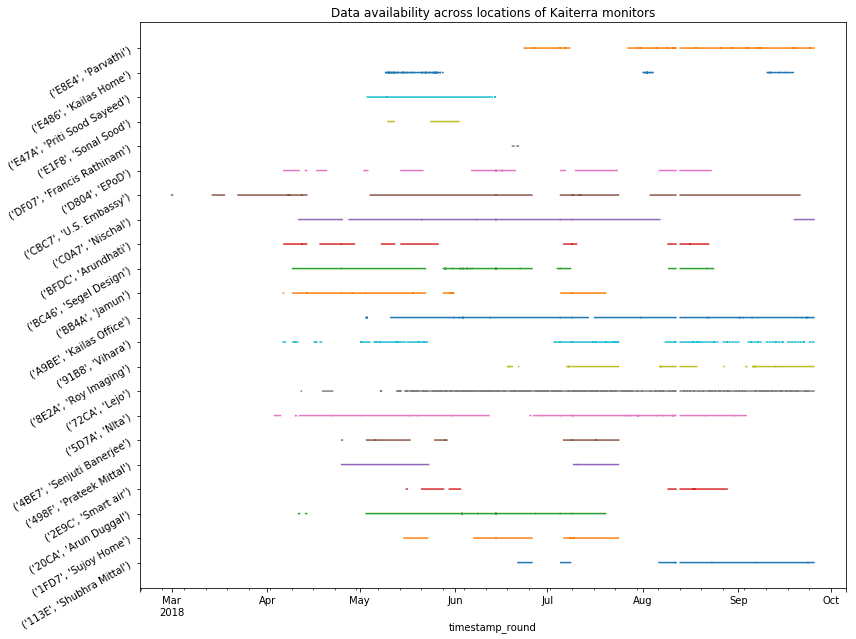

In [12]:
grouped = df.groupby(level=0)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

for count, (name, group) in enumerate(grouped, 1):
    # plot the data availability
    group.reset_index(level=0, drop=True, inplace=True)
    group.pm25.where(np.isnan(group.pm25), other=count).plot()

ax.set_yticks(np.arange(1,count+1))
ax.set_yticklabels([(name, group.location[0]) for (name,group) in grouped], rotation=30)
ax.set_title('Data availability across locations of Kaiterra monitors')
plt.tight_layout()
fig.savefig('data/datagaps_kaiterra_fieldeggs_2018_Sep_28.png')
fig.savefig('data/datagaps_kaiterra_fieldeggs_2018_Sep_28.pdf')

In [13]:
plt.close('all')